# Linear Regression With Numpy

In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

## Preproccessing the Data

In [2]:
points = genfromtxt("data.csv", delimiter=",")
print(points)

[[ 32.50234527  31.70700585]
 [ 53.42680403  68.77759598]
 [ 61.53035803  62.5623823 ]
 [ 47.47563963  71.54663223]
 [ 59.81320787  87.23092513]
 [ 55.14218841  78.21151827]
 [ 52.21179669  79.64197305]
 [ 39.29956669  59.17148932]
 [ 48.10504169  75.3312423 ]
 [ 52.55001444  71.30087989]
 [ 45.41973014  55.16567715]
 [ 54.35163488  82.47884676]
 [ 44.1640495   62.00892325]
 [ 58.16847072  75.39287043]
 [ 56.72720806  81.43619216]
 [ 48.95588857  60.72360244]
 [ 44.68719623  82.89250373]
 [ 60.29732685  97.37989686]
 [ 45.61864377  48.84715332]
 [ 38.81681754  56.87721319]
 [ 66.18981661  83.87856466]
 [ 65.41605175 118.5912173 ]
 [ 47.48120861  57.25181946]
 [ 41.57564262  51.39174408]
 [ 51.84518691  75.38065167]
 [ 59.37082201  74.76556403]
 [ 57.31000344  95.45505292]
 [ 63.61556125  95.22936602]
 [ 46.73761941  79.05240617]
 [ 50.55676015  83.43207142]
 [ 52.22399609  63.35879032]
 [ 35.56783005  41.4128853 ]
 [ 42.43647694  76.61734128]
 [ 58.16454011  96.76956643]
 [ 57.50444762

In [3]:
x = [points[i][0] for i in range(len(points))]
print(x)

[32.50234526945303, 53.42680403327502, 61.53035802563644, 47.4756396347861, 59.81320786951232, 55.14218841394382, 52.211796692214, 39.299566694317065, 48.10504169176825, 52.55001444273382, 45.419730144973755, 54.35163488122892, 44.16404949677335, 58.16847071685779, 56.72720805709661, 48.95588856609372, 44.687196231480904, 60.297326851333466, 45.61864377295583, 38.81681753744564, 66.1898166067526, 65.41605174513407, 47.48120860786787, 41.57564261748702, 51.84518690563943, 59.37082201108952, 57.31000343834809, 63.61556125145331, 46.73761940797697, 50.55676014854777, 52.22399608555305, 35.56783004774663, 42.43647694405564, 58.16454011019286, 57.50444761534179, 45.44053072531998, 61.89622268029126, 33.09383173616396, 36.43600951138687, 37.67565486085074, 44.555608383275356, 43.31828263186572, 50.073145632289034, 43.87061264521837, 62.99748074755309, 32.66904376346719, 40.1668990087037, 53.57507753167366, 33.86421497177824, 64.7071386661213, 38.119824026822805, 44.5025380646451, 40.59953838

In [4]:
y = [points[i][1] for i in range(len(points))]
print(y)

[31.70700584656992, 68.77759598163891, 62.5623822979458, 71.54663223356778, 87.23092513368739, 78.21151827079923, 79.64197304980874, 59.17148932186951, 75.33124229706306, 71.30087988685035, 55.16567714595912, 82.47884675749792, 62.008923245725825, 75.39287042599496, 81.43619215887864, 60.723602440673965, 82.89250373145371, 97.37989686216608, 48.84715331735507, 56.877213186268506, 83.87856466460276, 118.5912173025225, 57.25181946226897, 51.39174407983231, 75.38065166531236, 74.76556403215137, 95.45505292257474, 95.22936601755531, 79.05240616956559, 83.43207142132371, 63.35879031749788, 41.41288530370056, 76.61734128007404, 96.7695664261082, 74.08413011660252, 66.5881444142286, 77.76848241779302, 50.71958891231208, 62.12457081807178, 60.81024664990221, 52.68298336638778, 58.56982471769287, 82.90598148507051, 61.42470980433912, 115.24415280079529, 45.570588823376085, 54.08405479622361, 87.99445275811041, 52.725494375900425, 93.57611869265824, 80.16627544737096, 65.10171157056033, 65.56230

## Plotting the Data

Text(0.5,1,'Data after intial Proccessing')

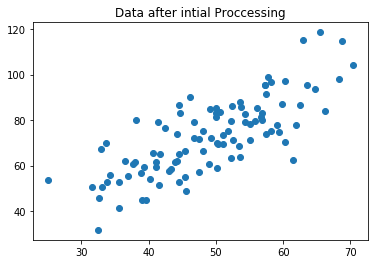

In [5]:
plt.scatter(x, y)
plt.title('Data after intial Proccessing')

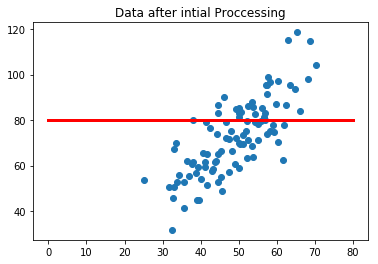

In [14]:
plt.scatter(x, y)
plt.title('Data after intial Proccessing')
plt.plot((0,80),(80,80), color='r', lw=3, label='Prediction Line')

## Cost Function

In [7]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

## Computing Gradient Decent

In [8]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

## Applying Gradient Decent

In [9]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

## Main Function for running the Model

In [10]:
def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

In [11]:
run()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473
